## 0. Libraries and Description

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict

## 1. Import and Read Data

In [2]:
!kaggle competitions download -c spaceship-titanic

100%|████████████████████████████████████████| 299k/299k [00:00<00:00, 1.82MB/s]
100%|████████████████████████████████████████| 299k/299k [00:00<00:00, 1.80MB/s]


In [3]:
# Unzip 
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 2. Exploratory Data Analysis (EDA)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Summary statistics for training set

train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
print('Categorical Data: ')
cat_var = train.select_dtypes(include = ['object']).columns
for col in cat_var:
    print(col)

print('\nNumerical Data: ')
num_var = train._get_numeric_data().columns
for col in num_var:
    print(col)

Categorical Data: 
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name

Numerical Data: 
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [6]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
print('total data : ' + str(len(train)))
for col in train.columns:
    none = str(round(train[col].isnull().sum()/len(train)*100, 2)) + '%'
    print(col,':', none) 

total data : 8693
PassengerId : 0.0%
HomePlanet : 2.31%
CryoSleep : 2.5%
Cabin : 2.29%
Destination : 2.09%
Age : 2.06%
VIP : 2.34%
RoomService : 2.08%
FoodCourt : 2.11%
ShoppingMall : 2.39%
Spa : 2.11%
VRDeck : 2.16%
Name : 2.3%
Transported : 0.0%


In [110]:
def cat_count(cat_var: str):
    count = train[cat_var].value_counts(dropna = False)
    return count

def cat_trans(cat_var: str):
    vis = train[[cat_var, 'Transported']].groupby([cat_var], as_index = False).mean().sort_values(by = 'Transported', ascending = False)
    return vis

def cat_vis(cat_var: str):
    sns.barplot(x = cat_var, y ='Transported', data = train, palette = sns.color_palette("Blues"))
    plt.ylabel('Transport Probability')
    plt.title('Transport Probability by ' + cat_var)
    

## 2.1 Categorical Data
- HomePlanet
- CryoSleep
- Cabin
- Destination
- VIP

## 2.1.1 Categorical Data: Home Planet

In [9]:
# Value counts of the HomePlanet column 

cat_count('HomePlanet')

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [10]:
# Mean of survival by Home Planet

cat_trans('HomePlanet')

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


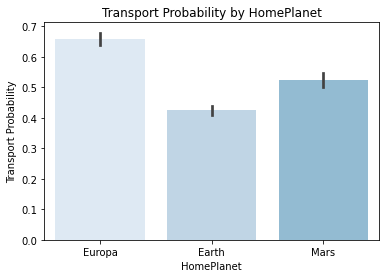

In [11]:
cat_vis('HomePlanet')

## 2.1.2 Categorical Data: CryoSleep

In [12]:
# Value counts of the CryoSleep column 

cat_count('CryoSleep')

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [13]:
# Mean of survival by CryoSleep

cat_trans('CryoSleep')

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


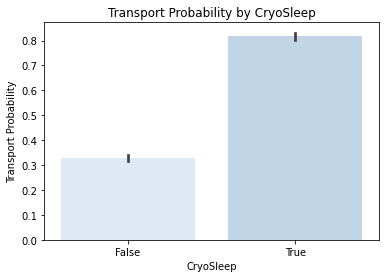

In [14]:
cat_vis('CryoSleep')

## 2.1.3 Categorical Data: Destination

In [15]:
# Value counts of the Destination column 

cat_count('Destination')

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64

In [16]:
# Mean of survival by Destination

cat_trans('Destination')

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


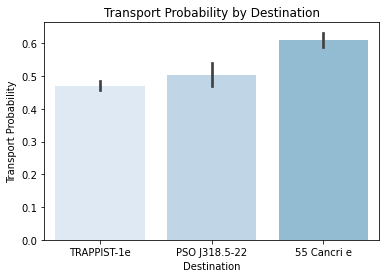

In [17]:
cat_vis('Destination')

## 2.1.3 Categorical Data: Destination

In [18]:
# Value counts of the VIP column 

cat_count('VIP')

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

In [19]:
# Mean of survival by VIP

cat_trans('VIP')

,VIP,Transported
0,False,0.506332
1,True,0.381910


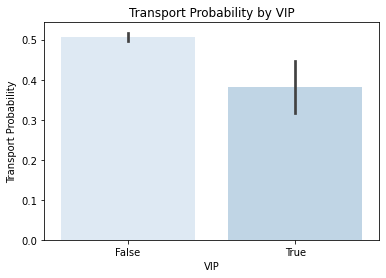

In [20]:
cat_vis('VIP')

## 2.2 Numerical Data
- Age
- RoomService
- FoodCourt
- ShoppingMall
- Spa
- VRDeck
- Transported

In [21]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

In [22]:
outliers_to_drop = detect_outliers(train, 2, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


<AxesSubplot:>

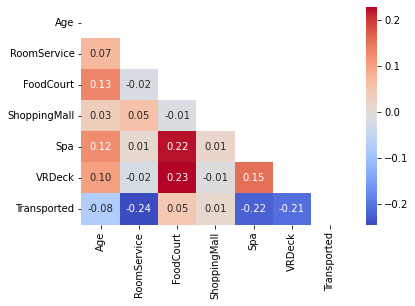

In [34]:
corr = train[num_var].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

sns.heatmap(train[num_var].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', mask = matrix)

# Comment: Ammenities have a negative correlation with transported. Perhaps, amenities should be combined. 

## 2.2.1 Numerical Data: Age

In [33]:
train['Age'].isnull().sum()

179

Text(0.5, 1.0, 'Passenger Age Distribution by Transportation')

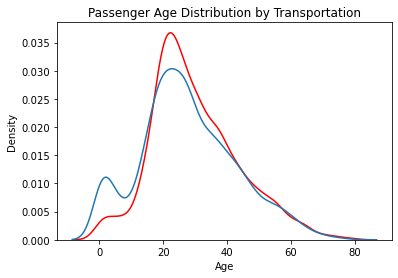

In [31]:
sns.kdeplot(train['Age'][train['Transported'] == 0], label = 'Not Transported', color = "red")
sns.kdeplot(train['Age'][train['Transported'] == 1], label = 'Transported')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Transportation')

## 2.2.2 Numerical Data: Amenities (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) 

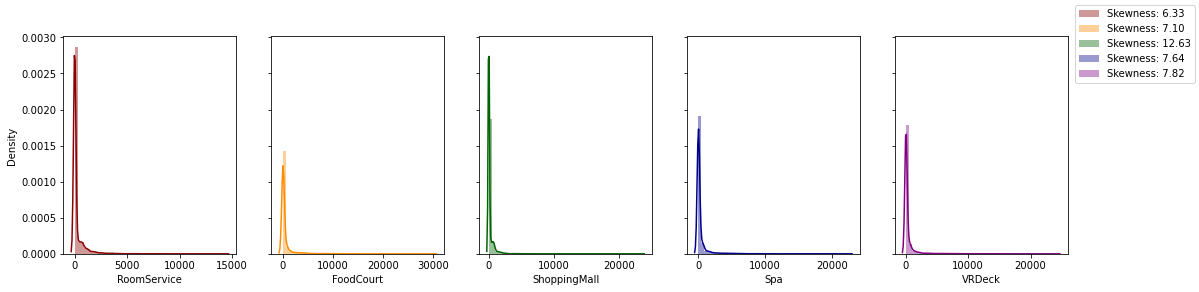

In [108]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5,sharey=True,figsize=(18,4))

sns.distplot(train['RoomService'], ax=ax1, color='darkred', label = 'Skewness: %.2f'%(train['RoomService'].skew()))
sns.distplot(train['FoodCourt'], ax=ax2, color='darkorange', label = 'Skewness: %.2f'%(train['FoodCourt'].skew()))
sns.distplot(train['ShoppingMall'], ax=ax3, color='darkgreen', label = 'Skewness: %.2f'%(train['ShoppingMall'].skew()))
sns.distplot(train['Spa'], ax=ax4, color='darkblue', label = 'Skewness: %.2f'%(train['Spa'].skew()))
sns.distplot(train['VRDeck'], ax=ax5, color='purple', label = 'Skewness: %.2f'%(train['VRDeck'].skew()))

fig.legend()

# Comment: High skewness will be fixed with log transformation.